# Homework 1 (October 18)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

# Описание задачи:

https://www.kaggle.com/lucidlenn/sloan-digital-sky-survey

Даны 10000 наблюдений различных объектов с телескопа. Необходимо предсказать, является ли объект:

* звездой (класс `STAR`)
* галактикой (системой звезд) (класс `QALAXY`) 
* квазаром (сверхъярким астрономическим объектом, имеющим малые угловые размеры) (класс `QSO`)

Для каждого примера существует 17 признаков:
* `objid` - идентификатор фотометрических данных изображения
* `ra` (Right Ascension - прямое восхождение) - угол в системе координат, привязанной к Солнечной системе (аналог долготы)
* `dec` (declination) - аналогичный угол, аналог широты. Вместе `ra` и `dec` однозначно задают направление, с которого пришел сигнал
* `u, g, r, i, z` - сигналы в пяти частотных каналах телескопа
* `run, rerun, camcol, field` (run number, rerun number, camera column, field number) - параметры, описывающие изображение, захваченное телескопом. `run` описывает номер конкретного снимка (могут повторяться), `rerun` - постобработку, `camcol` - категориальный признак, означает положение снимка (камера снимает небо построчно; каждый `run` разбит на 6 параллельных строк), `field` - минимальная ячейка внутри `camcol` размером 10х13 угловых минут. Более подробно о том, как устроены изображения, можно прочитать тут:
https://www.sdss.org/dr12/imaging/imaging_basics/
* `specobj` - идентификатор объекта (отличается от `objid`)
* `redshift` - величина красного смещения. Из-за эффекта Допплера излучение от движущихся объектов смещается в зависимости от скорости ($\Delta \omega = \omega_0 \frac{v}{c}$, где $\omega_0$ - исходная частота, $\Delta \omega$ - сдвиг частоты, $v$ - скорость объекта, $c$ - скорость света), и этот сдвиг можно предсказать, используя знания о спектре характерных частот (например, знание спектра излучения атома водорода)
* `plate, fiberid` - идентификаторы систем направления лучей в ячейки камеры
* `MJD` - дата эксперимента

In [2]:
data = pd.read_csv('./Skyserver_SQL2_27_2018 6_51_39 PM.csv')

In [3]:
data.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,0.000000e+00,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


С помощью метода describe() можно увидеть, что есть две колонки, которые не несут в себе информации, так как для каждого примера в них дано одно и то же значение:

**data['objid']** и **data['rerun']**

Это объясняется тем, что для всех изображений фотометрические данные и постобработка не различаются - это хорошо.

In [4]:
data = data.drop('objid', axis = 1)
data = data.drop('rerun', axis = 1)
data.describe()

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


* В колонке `ra` min отличается больше, чем на 3 std от квантиля 25% и от среднего  - это выброс. Возможно, интенсивность излучения от того же типа объекта изменится из-за взаимодействия лучей с земной атмосферой, но в этом не должно быть ничего страшного. То же самое с колонкой `dec`.
* В значениях `u, g, r, i, z, redshift` есть выбросы величиной в несколько стандартных отклонений (мы увидим их на графике двумя ячейками ниже, и заметим, что эти выбросы нескоррелированы по разным каналам. Это может объясняться как химическим составом астрономических объектов, так и аппаратными ошибками)
* В поле `specobjid` лежат очень большие значения с большим разбросом - обязательно нужно нормализовать

**Балансировка классов:**

In [5]:
for cl in data['class'].unique():
    print(cl, len(data.loc[data['class']==cl]))


STAR 4152
GALAXY 4998
QSO 850


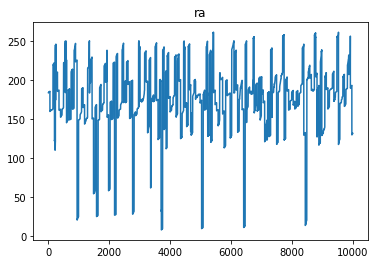

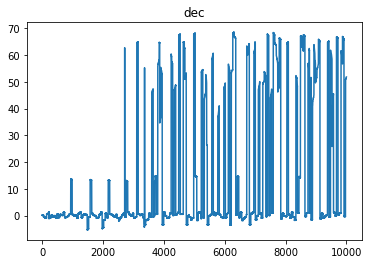

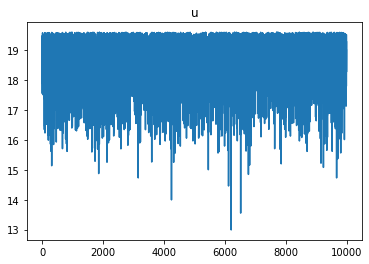

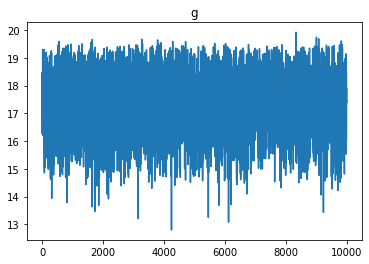

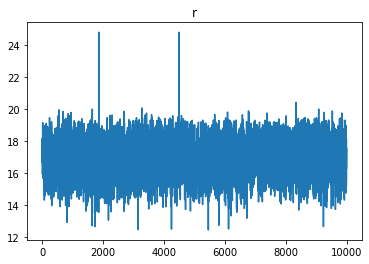

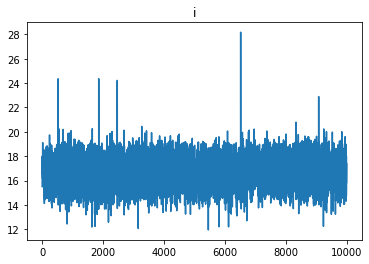

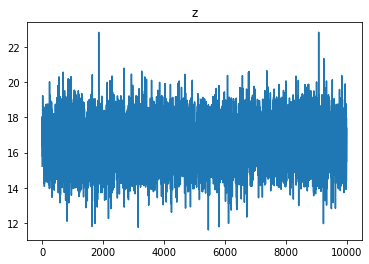

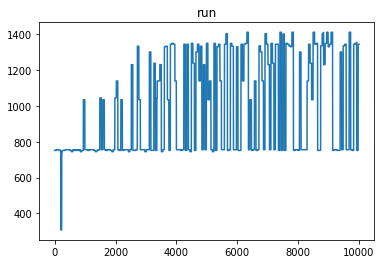

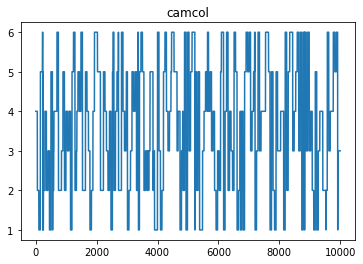

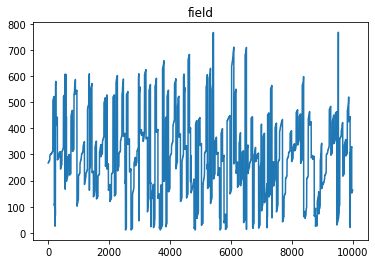

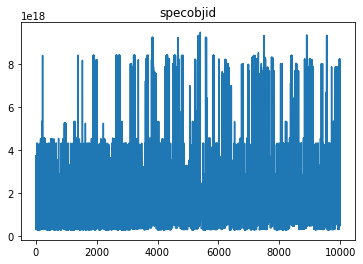

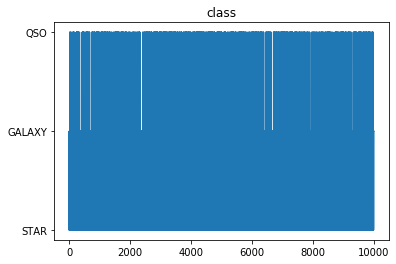

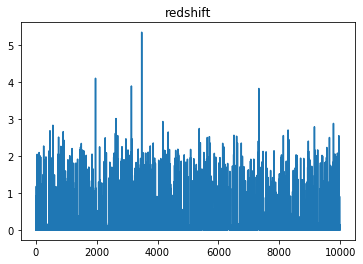

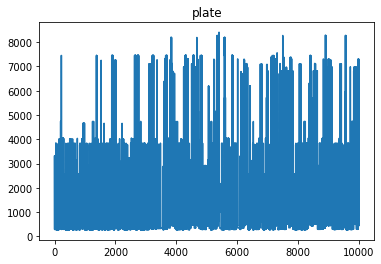

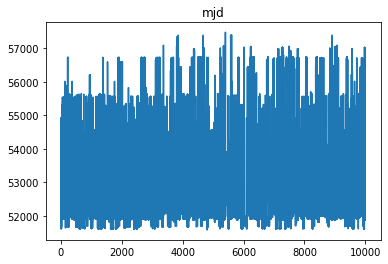

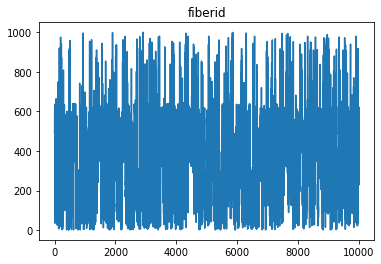

In [6]:
for column in data.columns:
    plt.figure()
    plt.title(column)
    plt.plot(data[column])

In [7]:
def color_big_values_red(val):
    color = 'red' if abs(val) > 0.3 else 'black'
    return 'color: %s' % color

In [8]:
data.corr().style.applymap(color_big_values_red)

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
ra,1,0.00359605,0.0312376,0.0439086,0.0471029,0.0457311,0.0429496,-0.0927406,-0.00629383,0.5947,-0.0953271,0.0303074,-0.0953293,-0.0868873,0.0574848
dec,0.00359605,1,0.0352793,0.0618747,0.063404,0.0582919,0.0568703,0.778385,0.114614,-0.131471,0.0883453,0.0670208,0.0883415,0.0661466,0.155012
u,0.0312376,0.0352793,1,0.849232,0.692379,0.60263,0.551483,0.0382291,0.00994467,0.00854788,-0.129429,0.163741,-0.12943,-0.168793,0.0113011
g,0.0439086,0.0618747,0.849232,1,0.958106,0.907419,0.879622,0.0584463,0.010223,0.0146511,-0.0549791,0.407576,-0.0549808,-0.0927716,0.0471874
r,0.0471029,0.063404,0.692379,0.958106,1,0.977672,0.969197,0.0572606,0.0107473,0.0171329,0.0197883,0.44108,0.0197867,-0.00934451,0.0610814
i,0.0457311,0.0582919,0.60263,0.907419,0.977672,1,0.981507,0.0497648,0.0134608,0.0197815,0.0729599,0.43145,0.0729584,0.0508962,0.0699774
z,0.0429496,0.0568703,0.551483,0.879622,0.969197,0.981507,1,0.0482523,0.0109298,0.0182484,0.112398,0.424034,0.112397,0.0956584,0.06798
run,-0.0927406,0.778385,0.0382291,0.0584463,0.0572606,0.0497648,0.0482523,1,0.151814,-0.463898,0.0936044,0.059056,0.0936011,0.0703543,0.138566
camcol,-0.00629383,0.114614,0.00994467,0.010223,0.0107473,0.0134608,0.0109298,0.151814,1,-0.0679205,0.0408094,0.00683354,0.0407946,0.026284,0.535629
field,0.5947,-0.131471,0.00854788,0.0146511,0.0171329,0.0197815,0.0182484,-0.463898,-0.0679205,1,-0.0937238,0.0154136,-0.0937232,-0.086558,-0.0404929


Можно заметить, что данные в частотных каналах имеют близкий к единице коэффициент корреляции, особенно в соседних каналах. Это и не удивительно, так как спектр излучения объектов, в основном, непрерывный. Это не очень хорошо, так как независимые признаки несли бы в себе больше информации.

Можно обнаружить высокие коэффициенты корелляции между колонками с данными об экспериментах, например, `plate` и `mjd` - это означает, что оптические системы меняли по временному графику. Или, например, корелляция параметров `run` и `dec` несет в себе информацию о том, в какой последовательности телескоп сканировал участки неба - это интересно подметить, но нам эти знания, скорее всего, не пригодятся. 

Также большой коэффициент (0.78) между колонками `dec` и `camcol` - это объясняется особенностями построения телескопа.

Интересно подумать, почему с ростом интенсивности растет величина красного смещения (корелляция $\approx$ 0.4) - возможно, существует физическое объяснение, например, потому что в большинстве случаев максимум спектра излучения лежит в интервале частот, не снимаемых телескопом, и допплеровское смещение сдвигает этот максимум в видимый диапазон. Но утверждать этого наверняка, основываясь на имеющихся данных, нельзя. 

In [9]:
print(np.mean(data.values == data.dropna().values))

1.0


1.0 означает, что пропущенных значений нет

*Обработка категориальных признаков*

In [10]:
data.at[data['class'] == 'STAR', 'class'] = 0
data.at[data['class'] == 'GALAXY', 'class'] = 1
data.at[data['class'] == 'QSO', 'class'] = 2
data['class'].describe()

count    10000.000000
mean         0.669800
std          0.625465
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: class, dtype: float64

*Нормализация*

Приведем все поля, кроме поля `class`, к одним масштабам изменения

In [11]:
print(data.describe())
for col in [col for col in data.columns if col != 'class']:
    data[col] -= np.mean(data[col].values)
    data[col] /= np.std(data[col].values)
print(data.describe())

                 ra           dec             u             g             r  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean     175.529987     14.836148     18.619355     17.371931     16.840963   
std       47.783439     25.212207      0.828656      0.945457      1.067764   
min        8.235100     -5.382632     12.988970     12.799550     12.431600   
25%      157.370946     -0.539035     18.178035     16.815100     16.173333   
50%      180.394514      0.404166     18.853095     17.495135     16.858770   
75%      201.547279     35.649397     19.259232     18.010145     17.512675   
max      260.884382     68.542265     19.599900     19.918970     24.802040   

                  i             z           run        camcol         field  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      16.583579     16.422833    981.034800      3.648700    302.380100   
std        1.141805      1.203188    273.305024    

При такой нормализации значения `min`, `max` и квантили оказались порядка единицы - это хорошо

*Классификатор*

In [12]:
X = data.drop('class', axis = 1).values
y = data['class'].values
print(X.shape, y.shape)

(10000, 15) (10000,)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape, X_test.shape)

(7000, 15) (3000, 15)


In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [15]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)

In [16]:
print(err_test)

0.10166666666666667


Сработало!

In [17]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[1036  180    1]
 [  75 1420    2]
 [  18   29  239]]


-- Можно отметить, что квазары достаточно хорошо отделяются от звезд и галактик

Запустим подбор параметров методом GridSearch

In [172]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

NameError: name 'KNeighborsClassifier' is not defined

Попробуем посмотреть, как изменится точность, если сбалансировать тренировочную выборку по классам, выкинув часть звезд и галактик

In [19]:
X_train, y_train = sklearn.utils.shuffle(X_train, y_train)
y_star = y_train[np.squeeze(np.argwhere(y_train==0))]
X_star = X_train[np.squeeze(np.argwhere(y_train==0))]
y_galaxy = y_train[np.squeeze(np.argwhere(y_train==1))]
X_galaxy = X_train[np.squeeze(np.argwhere(y_train==1))]
y_qso = y_train[np.squeeze(np.argwhere(y_train==2))]
X_qso = X_train[np.squeeze(np.argwhere(y_train==2))]
print(X_star.shape, X_galaxy.shape, X_qso.shape)
X_star = X_star[:len(X_star)//5]
y_star = y_star[:len(y_star)//5]
X_galaxy = X_galaxy[:len(X_galaxy)//6]
y_galaxy = y_galaxy[:len(y_galaxy)//6]
print(X_star.shape, X_galaxy.shape, X_qso.shape)

(2935, 15) (3501, 15) (564, 15)
(587, 15) (583, 15) (564, 15)


In [20]:
X_train2 = np.concatenate((X_star, X_galaxy, X_qso), axis = 0)
y_train2 = np.concatenate((y_star, y_galaxy, y_qso), axis = 0)
X_train2, y_train2 = sklearn.utils.shuffle(X_train2, y_train2)

print(X_train2.shape, y_train2.shape)

(1734, 15) (1734,)


In [21]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train2, y_train2)
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
print(err_test)

0.12133333333333333


Ошибка ухудшилась, потому что стало меньше примеров в выборе - это особенность метода knn. В данном случае такой прием не подходит.

Попробуем другие методы

In [173]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.038 0.04533333333333334


In [174]:
Cs = 10.**np.arange(-5, 5)
gamma_array = 10.**np.arange(-5, 5)
svc = SVC(gamma='auto')
grid = GridSearchCV(svc, cv=3, param_grid = {'C': Cs, 'gamma': gamma_array}, verbose=10, n_jobs = -1)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print(best_cv_err, best_C, grid.best_estimator_.gamma)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   55.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  1

0.012142857142857122 10000.0 0.001


In [28]:
print(grid.best_estimator_)

SVC(C=10000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [29]:
svc = SVC(C = grid.best_estimator_.C, gamma  = grid.best_estimator_.gamma)
svc.fit(X_train, y_train)
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_test)

0.011333333333333334


Метод C-Support Vector Classification работает на порядок лучше!

In [30]:
svc = SVC(C = grid.best_estimator_.C, gamma  = grid.best_estimator_.gamma)
svc.fit(X_train2, y_train2)
err_test  = np.mean(y_test  != svc.predict(X_test))
print(err_test)

0.019333333333333334


Прием с выкидыванием "лишних" примеров здесь тоже не работает

In [31]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.009333333333333334


Почти идеально!

Однако ошибка на train очень маленькая, это оверфит. Нужно уменьшить количество деревьев в лесу - это обобщит алгоритм.

In [35]:
rf = ensemble.RandomForestClassifier(n_estimators = 10)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)



0.002 0.011


 -- Почти ничего не изменилось (но зато алгоритм ускорился и упростился)

In [36]:
print(confusion_matrix(y_test, rf.predict(X_test)))

[[1216    1    0]
 [  12 1483    2]
 [   0   18  268]]


-- Случайному лесу, в отличие от knn, сложнее отличать квазары от галактик

In [37]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
feature_names = [col for col in data.columns if col != 'class']
for f in range(X_train.shape[1]):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))   

Feature ranking:
 1. feature 'redshift' (0.421931)
 2. feature '  mjd' (0.133295)
 3. feature 'plate' (0.094190)
 4. feature 'specobjid' (0.092247)
 5. feature '    i' (0.078569)
 6. feature '    z' (0.054872)
 7. feature '    r' (0.041746)
 8. feature '    g' (0.039275)
 9. feature '    u' (0.017361)
10. feature '   ra' (0.006879)
11. feature '  dec' (0.005256)
12. feature 'field' (0.004636)
13. feature '  run' (0.004421)
14. feature 'fiberid' (0.003821)
15. feature 'camcol' (0.001499)


Как и можно было предположить изначально, в основном классификатор использует признаки "красное смещение" и интенсивности в частотных каналах. При этом для него почти неважно направление излучения ("dec" и "ra"), но при этом имеется небольшая зависимость от даты наблюдения - это плохо (может быть, обсерватория специально снимала только квазары в какой-то определенный день). Возможно, чтобы получить более "честный" результат, эти параметры необходимо отбросить

In [38]:
X = np.stack((data['redshift'].values,data['u'].values, data['i'].values, data['r'].values, data['z'].values, data['g'].values), axis = 1)
y = data['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape, X_test.shape)

(7000, 6) (3000, 6)


In [39]:
rf = ensemble.RandomForestClassifier(n_estimators = 10)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0012857142857142856 0.009


Результат улучшился! При этом он имеет более прозрачный физический смысл.

In [40]:
print(confusion_matrix(y_test, rf.predict(X_test)))

[[1215    2    0]
 [   8 1486    3]
 [   0   14  272]]


# Вывод

Мы научились с точностью 99% разделять астрономические объекты на классы "звезда", "галактика" и "квазар", используя данные с телескопа. Наилучшую точность показал алгоритм RandomForest. Оказалось, что выкидывание лишних данных может улучшить алгоритм. Мы попробовали сбалансировать тренировочную выборку, но это не увеличило точность.

# Homework 2 (November 18)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import confusion_matrix

%matplotlib inline

data = pd.read_csv('./Skyserver_SQL2_27_2018 6_51_39 PM.csv')

# нормировать, инче данные, имеющие большой масштаб изменения, будут иметь больший вклад в функцию ошибок регрессии
for col in [col for col in data.columns if col != 'class']: 
    data[col] -= np.mean(data[col].values)
    if np.std(data[col].values) == 0: # эти значения не нужны в любом случае
        data = data.drop(col, axis = 1)
    else:
        data[col] /= np.std(data[col].values)
data.at[data['class'] == 'STAR', 'class'] = 0
data.at[data['class'] == 'GALAXY', 'class'] = 1
data.at[data['class'] == 'QSO', 'class'] = 2

X = data.drop('class', axis = 1).values
y = data['class'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [3]:
data.describe()

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,-2.842171e-16,-2.273737e-17,4.317613e-15,-1.278977e-15,6.536993e-17,-2.728484e-15,2.430056e-16,-2.273737e-17,2.160050e-16,-1.648459e-16,1.598721e-17,0.669800,5.826450e-17,1.527667e-17,-1.828937e-15,1.250555e-16
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,0.625465,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-3.501281e+00,-8.019842e-01,-6.794939e+00,-4.836401e+00,-4.129735e+00,-4.060765e+00,-3.999927e+00,-2.462701e+00,-1.589761e+00,-1.792340e+00,-6.680794e-01,0.000000,-3.803474e-01,-6.680795e-01,-9.036833e-01,-1.706690e+00
25%,-3.800469e-01,-6.098614e-01,-5.326003e-01,-5.889842e-01,-6.252917e-01,-6.392605e-01,-6.687137e-01,-8.380609e-01,-9.895566e-01,-7.281809e-01,-6.485418e-01,0.000000,-3.695000e-01,-6.485121e-01,-6.905900e-01,-8.062492e-01
50%,1.018087e-01,-5.724490e-01,2.820849e-01,1.303176e-01,1.667744e-02,-2.504428e-02,-2.733555e-02,-8.234245e-01,2.108517e-01,-2.079171e-02,-5.702194e-01,1.000000,-2.601513e-01,-5.702425e-01,-6.263973e-01,-1.003161e-02
75%,5.445107e-01,8.255640e-01,7.722253e-01,6.750654e-01,6.291138e-01,5.911733e-01,5.972884e-01,1.280557e+00,8.110559e-01,6.865975e-01,6.138735e-01,1.000000,-1.315668e-01,6.138650e-01,1.008862e+00,7.607361e-01
max,1.786365e+00,2.130270e+00,1.183354e+00,2.694110e+00,7.456210e+00,1.015640e+01,5.327968e+00,1.576944e+00,1.411260e+00,2.864126e+00,3.884908e+00,2.000000,1.340210e+01,3.884976e+00,3.002807e+00,3.136058e+00


Baseline

In [4]:
rf = ensemble.RandomForestClassifier(n_estimators = 10)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test_baseline  = np.mean(y_test  != rf.predict(X_test))

print('Train error: \n', err_train, ' \nTest error: \n', err_test_baseline)

Train error: 
 0.0015714285714285715  
Test error: 
 0.009666666666666667


Визуализация

Variances: 
 [0.30675716 0.2125822 ]


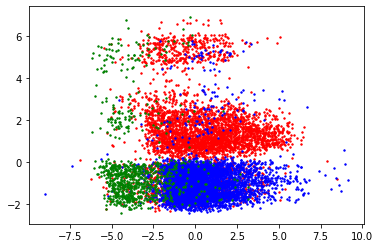

In [5]:
pca = sklearn.decomposition.PCA(n_components = 2)
X_view = pca.fit_transform(X)
print('Variances: \n', pca.explained_variance_ratio_)
plt.scatter(X_view[y == 0, 0], X_view[y == 0, 1], color = 'red', s = 2)
plt.scatter(X_view[y == 1, 0], X_view[y == 1, 1], color = 'blue', s = 2)
plt.scatter(X_view[y == 2, 0], X_view[y == 2, 1], color = 'green', s = 2)


 - на этой плоскости можно легко увидеть три кластера, отвечающих каждому классу
 

Как было выяснено выше, в данных имеется несколько коррелированных столбцов, имеющих очевидный физический смысл и представляющих доминирующую важность для классификатора (назовем их physical components). Посмотрим, как выглядят они после одномерного и двумерного преобразования:

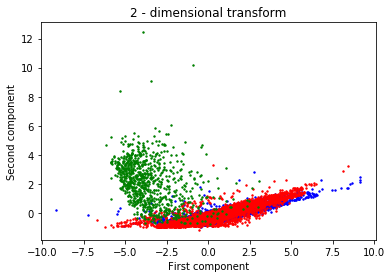

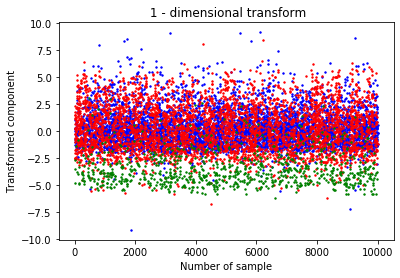

In [6]:
X_small = np.stack((data['redshift'].values,data['u'].values, data['i'].values, data['r'].values, data['z'].values, data['g'].values), axis = 1)
pca = sklearn.decomposition.PCA(n_components = 2)
X_view = pca.fit_transform(X_small)
plt.title('2 - dimensional transform')
plt.xlabel('First component')
plt.ylabel('Second component')
plt.scatter(X_view[y == 1, 0], X_view[y == 1, 1], color = 'blue', s = 2)
plt.scatter(X_view[y == 0, 0], X_view[y == 0, 1], color = 'red', s = 2)
plt.scatter(X_view[y == 2, 0], X_view[y == 2, 1], color = 'green', s = 2)
plt.show()

pca = sklearn.decomposition.PCA(n_components = 1)
X_view = pca.fit_transform(X_small)
t = np.linspace(0, X.shape[0], X.shape[0])
plt.title(' 1 - dimensional transform')
plt.xlabel('Number of sample')
plt.ylabel('Transformed component')
plt.scatter(t[y == 1], X_view[y == 1, 0], color = 'blue', s = 2)
plt.scatter(t[y == 0], X_view[y == 0, 0], color = 'red', s = 2)
plt.scatter(t[y == 2], X_view[y == 2, 0], color = 'green', s = 2)
plt.show()

- На двумерной плоскости видно, что квазары расположены вдоль вектора, ортогонального вектору, вдоль которого расположены звезды и галактикы, и, как следствие, квазары легко кластеризуются на одномерной картинке

- Очень трудно разделить звезды и галактики как на двумерной, так и на одномерной картинах

Классификатор на преобразованных данных:

In [7]:
pca = sklearn.decomposition.PCA(n_components = 2)
X_view = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_view, y, test_size = 0.3, random_state = 42)
rf = ensemble.RandomForestClassifier(n_estimators = 10)
rf.fit(X_train, y_train)
err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))
print('Train error: \n', err_train, ' \nTest error: \n', err_test)

print('Confusion matrix: \n', confusion_matrix(y_test, rf.predict(X_test)))

Train error: 
 0.014857142857142857  
Test error: 
 0.18233333333333332
Confusion matrix: 
 [[ 934  254   29]
 [ 154 1326   17]
 [  53   40  193]]


In [8]:
pca = sklearn.decomposition.PCA(n_components = 2)
X_view = pca.fit_transform(X_small)
X_train, X_test, y_train, y_test = train_test_split(X_view, y, test_size = 0.3, random_state = 42)
rf = ensemble.RandomForestClassifier(n_estimators = 10)
rf.fit(X_train, y_train)
err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))
print('Train error (physical components): \n', err_train, ' \nTest error (physical components): \n', err_test)
print(confusion_matrix(y_test, rf.predict(X_test)))

Train error (physical components): 
 0.019857142857142858  
Test error (physical components): 
 0.315
[[ 773  435    9]
 [ 464 1027    6]
 [  17   14  255]]


Действительно, как видно из confusion matrix, ошибка разделения звезд и галактик велика. Точность на двух компонентах существенно ниже результата baseline.

Выберем такое число главных компонент, чтобы объясненная дисперсия $\alpha$ была не меньше 95%

In [9]:
alpha = 0.95

pca = sklearn.decomposition.PCA(n_components = X.shape[1])
pca.fit(X)
for i in range(len(pca.explained_variance_ratio_)):
    if np.sum(pca.explained_variance_ratio_[:X.shape[1] - i]) > alpha:
        continue
    else:
        break
X_transformed = pca.transform(X)[:, :i]
print('n_components: ', X.shape[1] - i, ', explained variance: ', np.sum(pca.explained_variance_ratio_[:i])) 
X_transformed = X_transformed[:, :i]
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size = 0.3, random_state = 42)

rf = ensemble.RandomForestClassifier(n_estimators = 10)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))
print('Train error: \n', err_train, ' \nTest error: \n', err_test)

n_components:  7 , explained variance:  0.9585944418979689
Train error: 
 0.004285714285714286  
Test error: 
 0.09466666666666666


Теперь построим график зависимости ошибки от числа компонент

Difference with baseline at n_components = max:  0.034


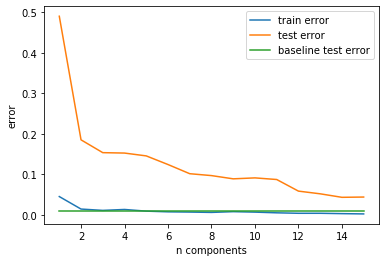

In [10]:
train = []
test = []
components = []
for i in range(1, X.shape[1]+1):
    pca = sklearn.decomposition.PCA(n_components = i)
    X_transformed = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size = 0.3, random_state = 42)
    rf = ensemble.RandomForestClassifier(n_estimators = 10)
    rf.fit(X_train, y_train)
    err_train = np.mean(y_train != rf.predict(X_train))
    err_test  = np.mean(y_test  != rf.predict(X_test))
    train.append(err_train)
    test.append(err_test)
    components.append(i)
plt.xlabel('n components')
plt.ylabel('error')
plt.plot(components, train, label = 'train error')
plt.plot(components, test, label = 'test error')
plt.plot(components, [err_test_baseline]*len(components), label = 'baseline test error')
plt.legend()
print('Difference with baseline at n_components = max: ', test[-1] - err_test_baseline)

Из графика видно, что ошибка классификации методом случайного леса равномерно убывает с увеличением числа компонент. При этом методом blind source separation не удается извлечь тот набор physical components, которые важны для классификатора. В данном случае это можно объяснить большим количеством ненужных коррелированных компонент, которые мешают выделению physical components. При этом нужно обратить внимание, что из-за большой корреляции ненужных компонент с physical components, даже при n_components = 15 ошибка не равна ошибке baseline.

Тем не менее, PCA успешно можно использовать для тех задач, где нужно выделить компоненты, не имея доступа к ответам обучающей выборки - например, при выделении компонент сердцебиения из RGB-сигнала в задачах RPPG (определения человеческого пульса по видеозаписи лица), или для упрощения задач поиска многомерного глобального минимума (например, в астрофизике).

Difference with baseline at n_components = max:  0.0003333333333333348


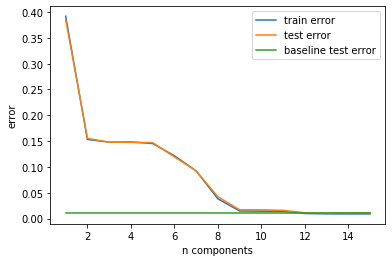

In [177]:
from sklearn.svm import SVC
train = []
test = []
components = []
for i in range(1, X.shape[1]+1):
    pca = sklearn.decomposition.PCA(n_components = i)
    X_transformed = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size = 0.3, random_state = 42)
    svc = SVC(gamma=0.001, C = 10000) # best grid search parameters from high above
    svc.fit(X_train, y_train)
    err_train = np.mean(y_train != svc.predict(X_train))
    err_test  = np.mean(y_test  != svc.predict(X_test))
    train.append(err_train)
    test.append(err_test)
    components.append(i)
plt.xlabel('n components')
plt.ylabel('error')
plt.plot(components, train, label = 'train error')
plt.plot(components, test, label = 'test error')
plt.plot(components, [err_test_baseline]*len(components), label = 'baseline test error')
plt.legend()
print('Difference with baseline at n_components = max: ', test[-1] - err_test_baseline)


Постфактум можно сказать, что лучшее значение количества компонент для случайного леса - 15 (все компоненты), а для классификатора SVM - 9 или 12 (такое количество компонент, что при дальнейшем его увеличении ошибка меняется незначительно), что отличается от значения, полученного по правилу "взять количество компонент, описывающих 95% дисперсии"

# Homework 3 (December 16)

Обучить полносвязную нейронную сеть

In [105]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
data = pd.read_csv('./Skyserver_SQL2_27_2018 6_51_39 PM.csv')
# нормировать, иначе данные, имеющие большой масштаб изменения, будут иметь больший вклад в функцию ошибок регрессии
for col in [col for col in data.columns if col != 'class']: 
    data[col] -= np.mean(data[col].values)
    if np.std(data[col].values) == 0: # эти значения не нужны в любом случае
        data = data.drop(col, axis = 1)
    else:
        data[col] /= np.std(data[col].values)
data.at[data['class'] == 'STAR', 'class'] = 0
data.at[data['class'] == 'GALAXY', 'class'] = 1
data.at[data['class'] == 'QSO', 'class'] = 2
X = data.drop('class', axis = 1).values
y = data['class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7000, 15) (3000, 15) (7000,) (3000,)


Baseline

In [107]:
rf = ensemble.RandomForestClassifier(n_estimators = 10)
rf.fit(X_train, y_train)
print('Error test', np.mean(y_test  != rf.predict(X_test)), 'score', rf.score(X_test, y_test))

Error test 0.012 score 0.988


Подбираем оптимальные параметры слоев

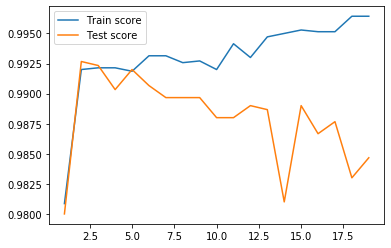

In [83]:
test_scores =[]
train_scores =[]
for i in tqdm(range(1, 20)):
    mlp_model = MLPClassifier(alpha = 0, hidden_layer_sizes = (i,), solver = 'lbfgs', 
                              activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)
    train_scores.append(mlp_model.score(X_train, y_train))
    test_scores.append(mlp_model.score(X_test, y_test))
plt.plot(range(1, 20), train_scores, label = 'Train score')
plt.plot(range(1, 20), test_scores, label = 'Test score')
plt.legend()

1e-05 0.9926666666666667
2.1544346900318823e-05 0.992
4.641588833612782e-05 0.9923333333333333
0.0001 0.9923333333333333
0.00021544346900318823 0.9923333333333333
0.00046415888336127773 0.992
0.001 0.9923333333333333
0.002154434690031882 0.9916666666666667
0.004641588833612777 0.992
0.01 0.9916666666666667


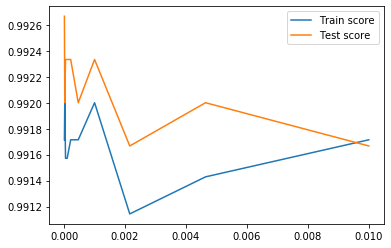

In [85]:
test_scores =[]
train_scores =[]

for alpha in tqdm(np.logspace(-5, -2, 10)):
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (2,), solver = 'lbfgs', 
                              activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)
    train_scores.append(mlp_model.score(X_train, y_train))
    test_scores.append(mlp_model.score(X_test, y_test))
    print(alpha, test_scores[-1])
plt.plot(np.logspace(-5, -2, 10), train_scores, label = 'Train score')
plt.plot(np.logspace(-5, -2, 10), test_scores, label = 'Test score')
plt.legend()

In [93]:
alpha_opt = 0
i_opt = 0
j_opt = 0
best_score = 0
for act in tqdm(['logistic', 'relu','tanh']):
    for alpha in np.logspace(-5, -3, 3):
        for i in range(1,7):
            for j in range(1, 7):
                mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (i,j), solver = 'lbfgs', 
                                          activation = 'logistic', random_state = 42)
                mlp_model.fit(X_train, y_train)
                test_score = mlp_model.score(X_test, y_test)
                if test_score >= best_score:
                    best_score = test_score
                    i_opt = i
                    j_opt = j
                    print('New best score', best_score, i_opt, j_opt, alpha, act)


New best score 0.979 1 1 1e-05 logistic
New best score 0.9846666666666667 1 2 1e-05 logistic
New best score 0.9856666666666667 1 3 1e-05 logistic
New best score 0.9923333333333333 2 2 1e-05 logistic
New best score 0.993 3 3 1e-05 logistic
New best score 0.9936666666666667 3 6 1e-05 logistic


In [90]:
alpha_opt = 1e-5
i_opt = 0
j_opt = 0
s_opt = 0
best_score = 0
for s in tqdm(range(1,5)):
    for i in range(1,5):
        for j in range(1, 5):
            mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (i,j, s), solver = 'lbfgs', 
                                      activation = 'logistic', random_state = 42)
            mlp_model.fit(X_train, y_train)
            test_score = mlp_model.score(X_test, y_test)
            if test_score > best_score:
                best_score = test_score
                i_opt = i
                j_opt = j
                s_opt = s
                print('New best score', best_score, i_opt, j_opt, s_opt)

New best score 0.964 1 1 1
New best score 0.9843333333333333 1 2 1
New best score 0.9853333333333333 1 4 2
New best score 0.9856666666666667 3 2 2
New best score 0.991 4 1 2
New best score 0.993 3 3 3


[[1216    9    0]
 [   1 1485   15]
 [   0    3  271]]


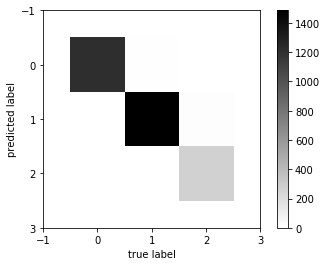

In [91]:
best_mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (i_opt,j_opt), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
y_test_pred = mlp_model.predict(X_test)
M = confusion_matrix(y_test_pred, y_test)
print(M)
plt.imshow(M)
plt.set_cmap('binary')
plt.xticks(range(-1, 4))
plt.yticks(range(-1, 4))

plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()

Методом перебора гиперпараметров мы выяснили, что из рассмотренных моделей лучшей является четырехсойный перцептрон MLPClassifier(alpha = 1e-5, hidden_layer_sizes = (3,6), solver = 'lbfgs', activation = 'logistic'). В предыдущем домашнем задании было выяснено, что в данной задаче при сокращении размерности пространства ошибка неизбежно растет. Попробуем проделать то же самое для лучшего MLP классификатора, выбрав количество компонент, обоснующее 95% вариации (не факт, что именно этот классификатор останется лучшим для преобразованных данных - это жадное предположение).

In [100]:
for i in range(X.shape[1]):
    pca = sklearn.decomposition.PCA(n_components = i+1)
    pca.fit(X)
    X_transformed = pca.transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size = 0.3, random_state = 42)
    best_mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (i_opt,j_opt), solver = 'lbfgs', 
                              activation = 'logistic', random_state = 42)
    best_mlp_model.fit(X_train, y_train)
    test_score = best_mlp_model.score(X_test, y_test)
    train_score = best_mlp_model.score(X_train, y_train)

    print('Components:', i+1, 'Train score:', train_score, ' Test score:', test_score)

Components: 1 Train score: 0.6161428571428571  Test score: 0.62
Components: 2 Train score: 0.854  Test score: 0.8516666666666667
Components: 3 Train score: 0.8561428571428571  Test score: 0.8593333333333333
Components: 4 Train score: 0.8618571428571429  Test score: 0.8603333333333333
Components: 5 Train score: 0.8621428571428571  Test score: 0.8623333333333333
Components: 6 Train score: 0.883  Test score: 0.8866666666666667
Components: 7 Train score: 0.9035714285714286  Test score: 0.9103333333333333
Components: 8 Train score: 0.9564285714285714  Test score: 0.9513333333333334
Components: 9 Train score: 0.9848571428571429  Test score: 0.984
Components: 10 Train score: 0.985  Test score: 0.984
Components: 11 Train score: 0.9864285714285714  Test score: 0.9843333333333333
Components: 12 Train score: 0.9901428571428571  Test score: 0.9886666666666667
Components: 13 Train score: 0.9895714285714285  Test score: 0.99
Components: 14 Train score: 0.9912857142857143  Test score: 0.9923333333333

# Вывод
Мы построили неглубокий MLP-классификатор и перебрали возможные значения гиперпараметров, а также попробовали применить преобразование PCA над входными данными. MLP-классификатор побил предыдущий рекорд, полученный методом случайного леса (точность на тестовых данных 0.9937 против 0.988).